### **Análisis Exploratioro de Datos del Dataset Final Security Camera Project**

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def leer_labels(label_path):
    """Lee un archivo .txt de etiquetas YOLO y devuelve una lista de boxes."""
    boxes = []
    with open(label_path, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            if len(parts) == 5:
                cls, x_center, y_center, width, height = parts
                boxes.append({
                    'class': int(cls),
                    'x_center': float(x_center),
                    'y_center': float(y_center),
                    'width': float(width),
                    'height': float(height)
                })
    return boxes

In [3]:
def analizar_split(split_path):
    images_path = os.path.join(split_path, 'images')
    labels_path = os.path.join(split_path, 'labels')

    image_files = glob.glob(os.path.join(images_path, '*.*'))
    label_files = glob.glob(os.path.join(labels_path, '*.txt'))

    print(f"--- Análisis de {os.path.basename(split_path)} ---")
    print(f"Total imágenes: {len(image_files)}")
    print(f"Total archivos de etiquetas: {len(label_files)}")

    all_boxes = []
    boxes_per_image = []

    for label_file in label_files:
        boxes = leer_labels(label_file)
        boxes_per_image.append(len(boxes))
        all_boxes.extend(boxes)

    print(f"Total cajas anotadas: {len(all_boxes)}")
    print(f"Promedio de cajas por imagen: {sum(boxes_per_image) / len(boxes_per_image):.2f}")

    # Crear DataFrame para análisis
    df = pd.DataFrame(all_boxes)

    if not df.empty:
        # Estadísticas básicas de las cajas
        print("\nEstadísticas de las cajas (valores relativos):")
        print(df[['x_center', 'y_center', 'width', 'height']].describe())

        # Histograma de número de cajas por imagen
        plt.figure(figsize=(8,4))
        plt.hist(boxes_per_image, bins=range(0, max(boxes_per_image)+2), alpha=0.7, color='blue', edgecolor='black')
        plt.title(f'Distribución de número de cajas por imagen en {os.path.basename(split_path)}')
        plt.xlabel('Número de cajas')
        plt.ylabel('Cantidad de imágenes')
        plt.grid(True)
        plt.show()

        # Histograma de ancho y alto de las cajas
        plt.figure(figsize=(12,5))

        plt.subplot(1,2,1)
        plt.hist(df['width'], bins=50, color='green', alpha=0.7)
        plt.title(f'Distribución de ancho de cajas en {os.path.basename(split_path)}')
        plt.xlabel('Ancho (relativo)')
        plt.ylabel('Cantidad')

        plt.subplot(1,2,2)
        plt.hist(df['height'], bins=50, color='orange', alpha=0.7)
        plt.title(f'Distribución de alto de cajas en {os.path.basename(split_path)}')
        plt.xlabel('Alto (relativo)')
        plt.ylabel('Cantidad')

        plt.tight_layout()
        plt.show()
    else:
        print("No se encontraron cajas anotadas en este split.")

In [4]:
def analizar_dataset(dataset_path):
    splits = ['train', 'valid', 'test']
    for split in splits:
        split_path = os.path.join(dataset_path, split)
        if os.path.exists(split_path):
            analizar_split(split_path)
        else:
            print(f"No se encontró el directorio {split} en {dataset_path}")

.
--- Análisis de train ---
Total imágenes: 23768
Total archivos de etiquetas: 23768
Total cajas anotadas: 21678
Promedio de cajas por imagen: 0.91

Estadísticas de las cajas (valores relativos):
           x_center      y_center         width        height
count  21678.000000  21678.000000  21678.000000  21678.000000
mean       0.478413      0.522509      0.304241      0.387199
std        0.167588      0.158580      0.289134      0.271487
min        0.010937      0.028125      0.001563      0.004687
25%        0.372656      0.428125      0.100781      0.171875
50%        0.493750      0.509375      0.181250      0.306250
75%        0.576562      0.627344      0.392188      0.529687
max        0.975000      0.967187      1.000000      1.000000


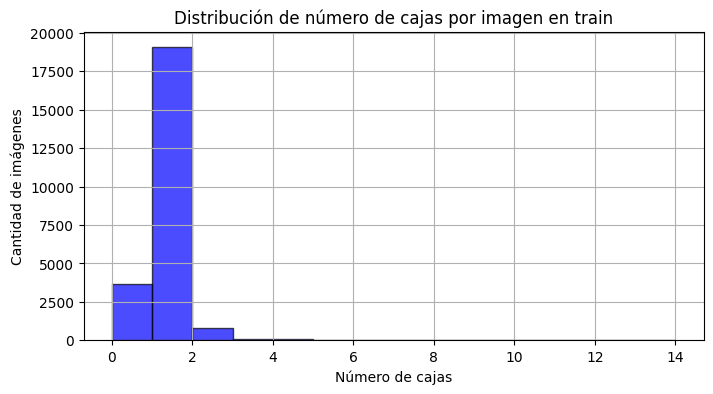

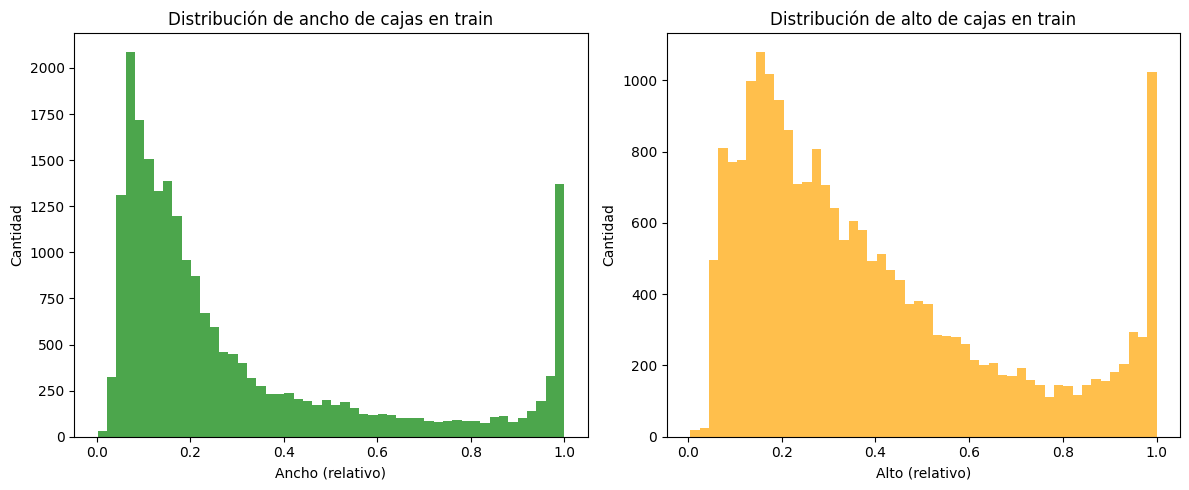

--- Análisis de valid ---
Total imágenes: 966
Total archivos de etiquetas: 966
Total cajas anotadas: 808
Promedio de cajas por imagen: 0.84

Estadísticas de las cajas (valores relativos):
         x_center    y_center       width      height
count  808.000000  808.000000  808.000000  808.000000
mean     0.479235    0.527459    0.293494    0.377742
std      0.169812    0.149396    0.288191    0.262878
min      0.037500    0.095312    0.024219    0.040625
25%      0.369727    0.434766    0.086133    0.178125
50%      0.491406    0.511719    0.163281    0.299609
75%      0.578125    0.632031    0.411523    0.515430
max      0.937500    0.908594    1.000000    0.996875


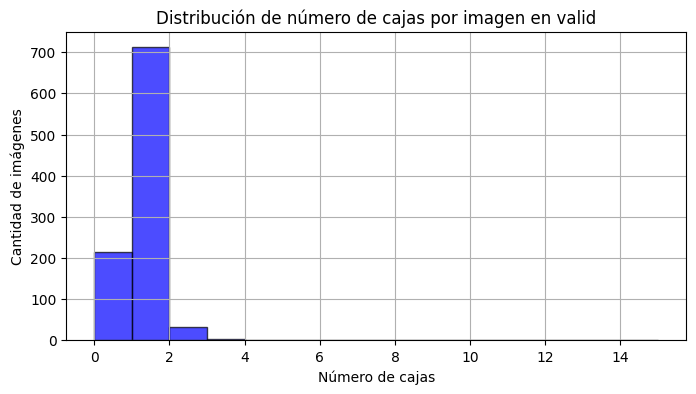

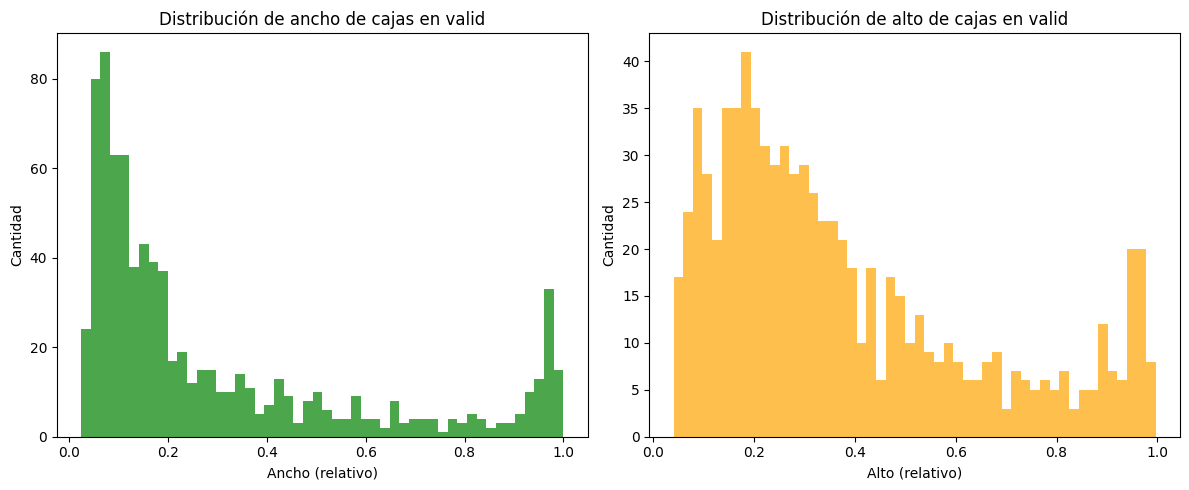

--- Análisis de test ---
Total imágenes: 945
Total archivos de etiquetas: 945
Total cajas anotadas: 812
Promedio de cajas por imagen: 0.86

Estadísticas de las cajas (valores relativos):
         x_center    y_center       width      height
count  812.000000  812.000000  812.000000  812.000000
mean     0.485286    0.514956    0.277976    0.370389
std      0.166167    0.159581    0.274366    0.256944
min      0.069531    0.085156    0.024219    0.033594
25%      0.394141    0.415625    0.089063    0.175781
50%      0.493359    0.511719    0.157422    0.298438
75%      0.591992    0.613281    0.366797    0.483594
max      0.935156    0.904687    1.000000    0.996875


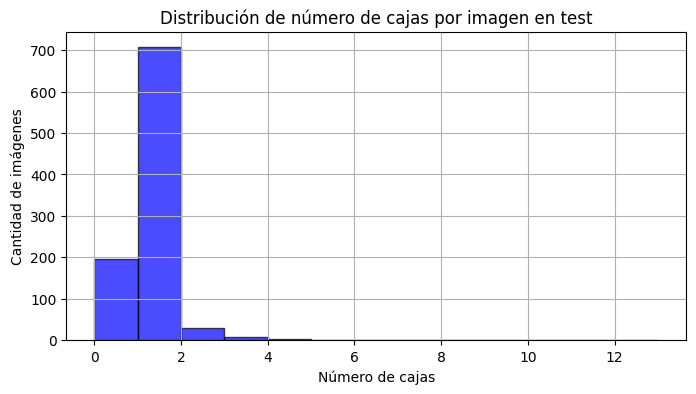

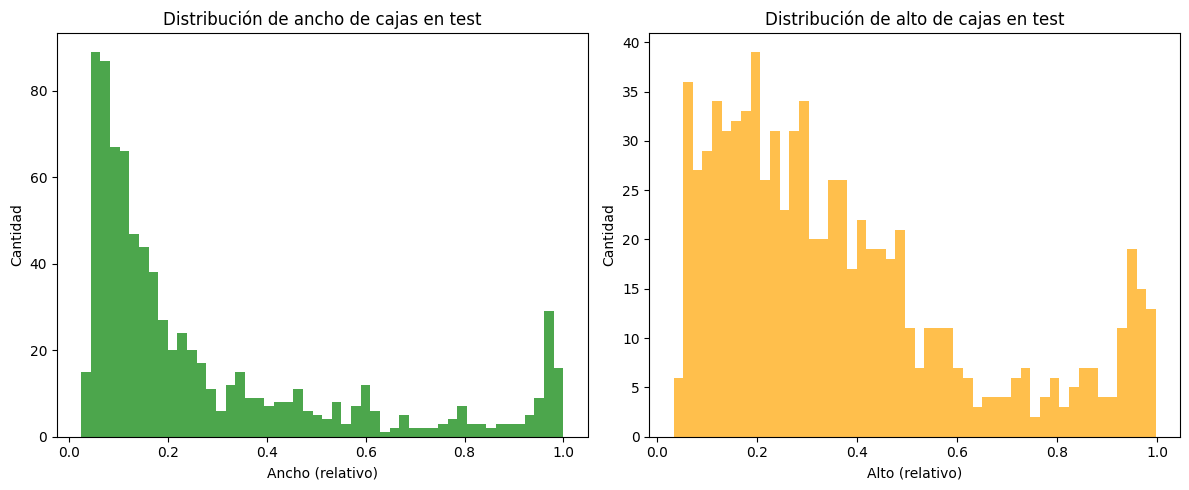

In [11]:
if __name__ == "__main__":
    # Cambia esta ruta por la ruta de tu dataset
    dataset_path = "."
    print(dataset_path)
    analizar_dataset(dataset_path)

### **Proporción de imágenes con presencia de pistola y ausencia de pistola del subconjunto train**

In [12]:
# Rutas
label_folder = 'train/labels/'

# Contadores
num_pistola = 0
num_background = 0

# Iteramos por todos los archivos de etiquetas
for label_file in os.listdir(label_folder):
    if label_file.endswith('.txt'):
        with open(os.path.join(label_folder, label_file), 'r') as f:
            lines = f.readlines()
            if not lines:  # Si el archivo está vacío
                num_background += 1
            else:
                has_pistola = any(line.strip().startswith('0')
                                  for line in lines)
                if has_pistola:
                    num_pistola += 1
                else:
                    # Aquí podrías contar otras clases si las tuvieras
                    pass

# Resultados
total = num_pistola + num_background
print(f"Imágenes con pistola: {num_pistola}")
print(f"Imágenes con fondo (background): {num_background}")
print(f"Proporción pistola : background = {num_pistola} : {num_background}")
print(f"Porcentaje de imágenes con pistola: {100 * num_pistola / total:.2f}%")
print(
    f"Porcentaje de imágenes background: {100 * num_background / total:.2f}%")

Imágenes con pistola: 20115
Imágenes con fondo (background): 3653
Proporción pistola : background = 20115 : 3653
Porcentaje de imágenes con pistola: 84.63%
Porcentaje de imágenes background: 15.37%


### **Proporción de imágenes con presencia de pistola y ausencia de pistola del subconjunto test**

In [13]:
# Rutas
label_folder = 'test/labels/'

# Contadores
num_pistola = 0
num_background = 0

# Iteramos por todos los archivos de etiquetas
for label_file in os.listdir(label_folder):
    if label_file.endswith('.txt'):
        with open(os.path.join(label_folder, label_file), 'r') as f:
            lines = f.readlines()
            if not lines:  # Si el archivo está vacío
                num_background += 1
            else:
                has_pistola = any(line.strip().startswith('0')
                                  for line in lines)
                if has_pistola:
                    num_pistola += 1
                else:
                    # Aquí podrías contar otras clases si las tuvieras
                    pass

# Resultados
total = num_pistola + num_background
print(f"Imágenes con pistola: {num_pistola}")
print(f"Imágenes con fondo (background): {num_background}")
print(f"Proporción pistola : background = {num_pistola} : {num_background}")
print(f"Porcentaje de imágenes con pistola: {100 * num_pistola / total:.2f}%")
print(
    f"Porcentaje de imágenes background: {100 * num_background / total:.2f}%")

Imágenes con pistola: 749
Imágenes con fondo (background): 196
Proporción pistola : background = 749 : 196
Porcentaje de imágenes con pistola: 79.26%
Porcentaje de imágenes background: 20.74%


### **Proporción de imágenes con presencia de pistola y ausencia de pistola del subconjunto valid**

In [14]:
# Rutas
label_folder = 'valid/labels/'

# Contadores
num_pistola = 0
num_background = 0

# Iteramos por todos los archivos de etiquetas
for label_file in os.listdir(label_folder):
    if label_file.endswith('.txt'):
        with open(os.path.join(label_folder, label_file), 'r') as f:
            lines = f.readlines()
            if not lines:  # Si el archivo está vacío
                num_background += 1
            else:
                has_pistola = any(line.strip().startswith('0')
                                  for line in lines)
                if has_pistola:
                    num_pistola += 1
                else:
                    # Aquí podrías contar otras clases si las tuvieras
                    pass

# Resultados
total = num_pistola + num_background
print(f"Imágenes con pistola: {num_pistola}")
print(f"Imágenes con fondo (background): {num_background}")
print(f"Proporción pistola : background = {num_pistola} : {num_background}")
print(f"Porcentaje de imágenes con pistola: {100 * num_pistola / total:.2f}%")
print(
    f"Porcentaje de imágenes background: {100 * num_background / total:.2f}%")

Imágenes con pistola: 751
Imágenes con fondo (background): 215
Proporción pistola : background = 751 : 215
Porcentaje de imágenes con pistola: 77.74%
Porcentaje de imágenes background: 22.26%
